In [18]:
########################
# IMPORTAMOS LOS DATOS #
########################
import pandas as pd

data = pd.read_csv("../../data/data_cleaned.csv")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [19]:
######################
# COL GASTOS PREMIUM #
######################

data["Gastos_premium"] = (data["MntWines"] + 
                                    data["MntMeatProducts"] + 
                                    data["MntFishProducts"] + 
                                    data["MntGoldProds"])

data[["Income", "Marital_Status", "Kidhome", "Teenhome", "Gastos_premium"]].head()


,Income,Marital_Status,Kidhome,Teenhome,Gastos_premium
0,58138.0,Single,0,0,1441
1,46344.0,Single,1,1,25
2,71613.0,Together,0,0,706
3,26646.0,Together,1,0,46
4,58293.0,Married,1,0,352


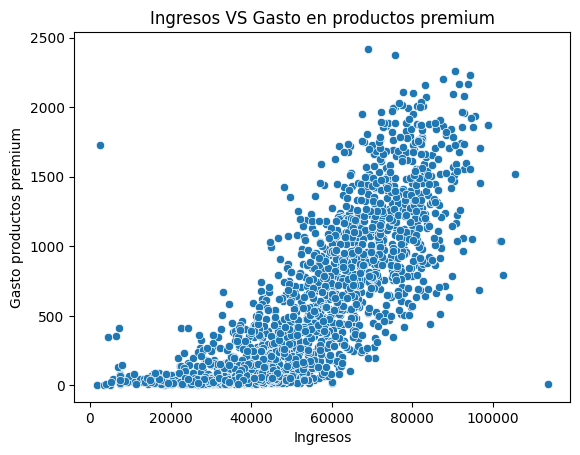

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

##############################
# INGRESOS VS GASTOS PREMIUM #
##############################

sns.scatterplot(x=data["Income"], y=data["Gastos_premium"])
plt.xlabel("Ingresos")
plt.ylabel("Gasto productos premium")
plt.title("Ingresos VS Gasto en productos premium")
plt.show()


In [21]:
##########################
# LIMPIEZA DE CATEGORÍAS #
##########################

data_cleaned = data[(data["Marital_Status"] != "Alone") & 
                    (data["Marital_Status"] != "Absurd") & 
                    (data["Marital_Status"] != "YOLO")]

data_cleaned["Marital_Status"] = data_cleaned["Marital_Status"].replace({
    "Single": "Soltero",
    "Divorced": "Soltero",
    "Widow": "Soltero",
    "Married": "Casado",
    "Together": "Casado"
})

print("Categorías :", data_cleaned["Marital_Status"].unique())



Categorías : ['Soltero' 'Casado']


C:\Users\carlo\AppData\Local\Temp\ipykernel_26168\2098569337.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["Marital_Status"] = data_cleaned["Marital_Status"].replace({


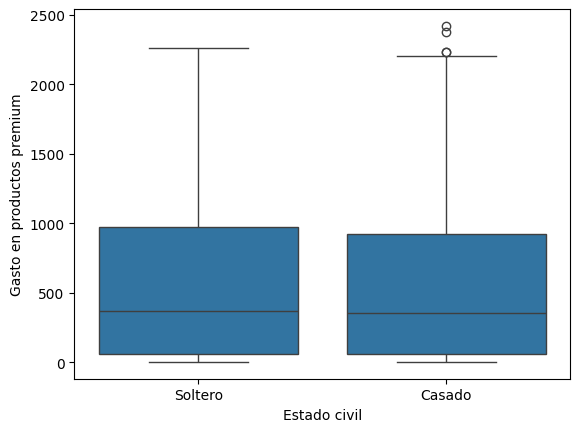

In [22]:
##############################
# GASTO PREMIUM ESTADO CIVIL #
##############################

sns.boxplot(x=data_cleaned["Marital_Status"], y=data_cleaned["Gastos_premium"])
plt.xlabel("Estado civil")
plt.ylabel("Gasto en productos premium")
plt.show()


In [23]:
print(data_cleaned.columns)


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Gastos_premium'],
      dtype='object')


C:\Users\carlo\AppData\Local\Temp\ipykernel_26168\1854323588.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["Hijos"] = "No"


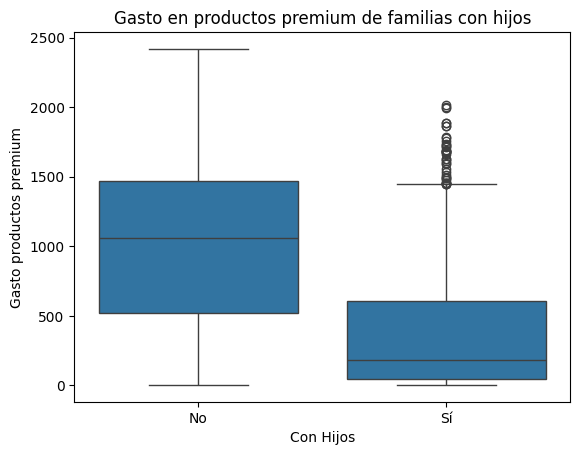

In [24]:
#######################
# GASTO PREMIUM HIJOS #
#######################

import pandas as pd
data_cleaned["Hijos"] = "No"
data_cleaned.loc[(data_cleaned["Kidhome"] > 0) | (data_cleaned["Teenhome"] > 0), "Hijos"] = "Sí"

sns.boxplot(x=data_cleaned["Hijos"], y=data_cleaned["Gastos_premium"])
plt.title("Gasto en productos premium de familias con hijos")
plt.xlabel("Con Hijos")
plt.ylabel("Gasto productos premium")
plt.show()
